# Web Scrapping

In [1]:
# It is used to extract the data from the website
# Two libraries of python used to scrape the data
# Requests and BeautifulSoup
# Requests is used to create connection between python and website
# and get the content from the website
# BeautifulSoup Library is used to scrape the data from the website

In [ ]:
# installing the Libraries
!pip install requests
!pip install beautifulsoup4

In [2]:
# importing required libraries
import pandas as pd
import matplotlib.pyplot as plt
import bs4
from bs4 import BeautifulSoup
import requests
import warnings
warnings.filterwarnings("ignore")

In [3]:
# most popular elements of HTML
# Elements Tag in HTML used to store content
# <p> tag is used to store paragraphs
# <a> tag is used to store links
# <li> tag is used to store data in list format
# <div> tag contain a combination of elements
# each div tag has class id which is unique

In [4]:
# checking the version
print(requests.__version__)

2.28.1


In [5]:
# Creating connection between python and webpage
url = "https://www.flipkart.com/search?q=lenovo+laptop&sid=6bo%2Cb5g&as=on&as-show=on&otracker=AS_QueryStore_OrganicAutoSuggest_1_5_na_na_na&otracker1=AS_QueryStore_OrganicAutoSuggest_1_5_na_na_na&as-pos=1&as-type=RECENT&suggestionId=lenovo+laptop%7CLaptops&requestId=c7b12e6b-09f7-4e34-bd73-f57e3d1ec97d&as-backfill=on"
req = requests.get(url)
req

<Response [200]>

In [6]:
# To get the content
soup = BeautifulSoup(req.text,'lxml')
soup

<!DOCTYPE html>
<html lang="en"><head><link href="https://rukminim2.flixcart.com" rel="preconnect"/><link href="//static-assets-web.flixcart.com/fk-p-linchpin-web/fk-cp-zion/css/app_modules.chunk.905c37.css" rel="stylesheet"/><link href="//static-assets-web.flixcart.com/fk-p-linchpin-web/fk-cp-zion/css/app.chunk.615ed9.css" rel="stylesheet"/><meta content="text/html; charset=utf-8" http-equiv="Content-type"/><meta content="IE=Edge" http-equiv="X-UA-Compatible"/><meta content="102988293558" property="fb:page_id"/><meta content="658873552,624500995,100000233612389" property="fb:admins"/><link href="https:///www/promos/new/20150528-140547-favicon-retina.ico" rel="shortcut icon"/><link href="/osdd.xml?v=2" rel="search" type="application/opensearchdescription+xml"/><meta content="website" property="og:type"/><meta content="Flipkart.com" name="og_site_name" property="og:site_name"/><link href="/apple-touch-icon-57x57.png" rel="apple-touch-icon" sizes="57x57"/><link href="/apple-touch-icon-72

In [9]:
# Creating an Empty list Called Product_Name
product_name = []
p = soup.find_all('div',class_="_4rR01T")
for i in p:
    prd = i.text
    product_name.append(prd)

In [11]:
print(product_name)

['Lenovo IdeaPad 1 AMD Athlon Dual Core 7120U - (8 GB/512 GB SSD/Windows 11 Home) 15AMN7 Thin and Light ...', 'Lenovo IdeaPad Slim 1 Intel Celeron Dual Core N4020 - (8 GB/256 GB SSD/Windows 11 Home) 14IGL7 Thin an...', 'Lenovo Intel Core i7 12th Gen 1255U - (16 GB/512 GB SSD/Windows 11 Home) V15 G3 IAP Thin and Light Lap...', 'Lenovo IdeaPad Gaming 3 Intel Core i5 11th Gen 11300H - (8 GB/512 GB SSD/Windows 11 Home/4 GB Graphics...', 'Lenovo Lenovo V15 Intel Celeron Dual Core 4th Gen - (8 GB/256 GB SSD/Windows 11 Home) 82QYA00MIN Lapto...', 'Lenovo IdeaPad Slim 3 Intel Core i3 11th Gen - (8 GB/256 GB SSD/Windows 11 Home) 15ITL6 Thin and Light...', 'Lenovo IdeaPad Gaming 3 AMD Ryzen 5 Hexa Core 5500H - (8 GB/512 GB SSD/Windows 11 Home/4 GB Graphics/N...', 'Lenovo Yoga Slim 6 Intel Evo Intel Core i5 12th Gen 1240P - (16 GB/512 GB SSD/Windows 11 Home) 14IAP8 ...', 'Lenovo IdeaPad Slim 3 Intel Core i3 11th Gen 1115G4 - (8 GB/512 GB SSD/Windows 11 Home) Ideapad 3 15IT...', 'Lenovo IdeaPad Sl

In [14]:
# Creating a program to scrape comments of Mama Earth product

# Creating Empty list to store reviews
product_reviews = []

for i in range(1,2870):
    # Creating Connection 
    url = "https://www.flipkart.com/mamaearth-ubtan-natural-dry-skin-turmeric-saffron-tan-removal-brightning-sls-paraben-free-face-wash/product-reviews/itm2caaeaf8e5a37?pid=FCWF7DWRBPHJGDZH&lid=LSTFCWF7DWRBPHJGDZHEU4YYL&marketplace=FLIPKART&page="+str(i)
    req = requests.get(url)

    # Extracting webpage content
    soup = BeautifulSoup(req.text,'lxml')

    # Extracting reviews infomation from the webpage content
    reviews = soup.find_all('div',class_='t-ZTKy')
    for i in reviews:
        rev = i.text
        product_reviews.append(rev)

print(product_reviews)

KeyboardInterrupt: 

In [13]:
len(product_reviews)

10

In [15]:
len(product_reviews)

7930

In [16]:
df = pd.DataFrame({"Reviews":product_reviews})
df.head()

,Reviews
0,This facewash is amazing. It gives such a fres...
1,It's just wow 👌I'm very happy for this brand. ...
2,its packaging was very nice. And you all alrea...
3,It's very good product I use it one time it's ...
4,good product.i will givefull review after usin...


In [ ]:
# Text Blob it is a library of python Which is used to Pre process
# textual data inculding sentiment analysis
!pip install textblob

In [18]:
import textblob
from textblob import TextBlob

In [19]:
# Creating a function to categorize the textual data
def sentiment_analysis(review):
    analysis = TextBlob(review)
    
    if analysis.sentiment.polarity > 0:
        return "Positive"
    elif analysis.sentiment.polarity < 0:
        return "Negative"
    else:
        return "Netural"

In [20]:
sentiment_analysis("The food is so delicious")

'Positive'

In [21]:
sentiment_analysis("The product not work properly")

'Netural'

In [22]:
sentiment_analysis("The customer is unsatisfied")

'Netural'

In [23]:
sentiment_analysis("The product is worst")

'Negative'

In [24]:
df['Categorize'] = df['Reviews'].apply(sentiment_analysis)
df.head()

,Reviews,Categorize
0,This facewash is amazing. It gives such a fres...,Positive
1,It's just wow 👌I'm very happy for this brand. ...,Positive
2,its packaging was very nice. And you all alrea...,Positive
3,It's very good product I use it one time it's ...,Positive
4,good product.i will givefull review after usin...,Positive


In [25]:
df['Categorize'].value_counts()

Positive    7731
Negative     193
Netural        6
Name: Categorize, dtype: int64

<Axes: >

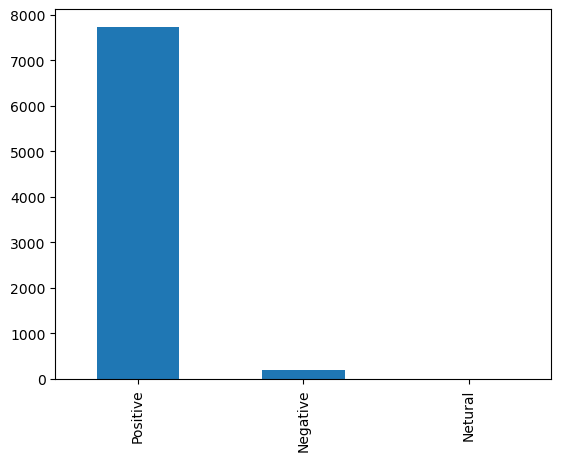

In [26]:
df['Categorize'].value_counts().plot(kind='bar')